<h1> ______________________________________ </h1>

<h1> Full NEXT100 with fiber panels simulation mapping analysis </h1>
<h1> ______________________________________ </h1>

<p style="font-size: 17px; color: black;"> In this Notebook we take as input the maps created in the previous notebook and use it to simulate an s2 signal for bb0nu events. </p>




<h1> ____________ </h1>
<h2> This version </h2>
<h1> ____________ </h1>

-  <p style="font-size: 17px; color: black;"> 100K ie S2 events. </p>
-  <p style="font-size: 17px; color: black;"> Mapping separated by sensors. </p>

-  <p style="font-size: 17px; color: black;"> Geant4 fundamental units: </p>

 -  <p style="font-size: 17px; color: black;"> Length [L]: mm (milimeter) </p>
 -  <p style="font-size: 17px; color: black;"> Time [T]: ns (nanosecond) </p>
 -  <p style="font-size: 17px; color: black;"> Energy [E]: MeV (megaelectronvolt) </p>





In [1]:
import numpy              as np
import pandas             as pd

import scipy              
from scipy                import stats, integrate
from scipy.signal         import convolve

import matplotlib.pyplot  as plt

from matplotlib.ticker    import FormatStrFormatter # to set the format of the plot's axis
from matplotlib.patches   import Rectangle # To add blanck spaces in tabular legends

import os
import math
import tables             as tb

In [2]:
def sens_map(selected_id):
    
    # we select the response of the sensors at the end of the fibers
    pp = '/home/investigator/mariandbt/python/data'
    pp = pp + '/20231025_NEXT100_full_mapping'

    flnm = os.path.join(pp, "Next100_full_mapp_s2_inicioEL_100Kev.next.h5")
    sens = pd.read_hdf(flnm, "/MC/sns_positions")
    dst_particle = pd.read_hdf(flnm, "/MC/particles")

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10), constrained_layout=True)
    
    ax.plot(dst_particle.initial_x, dst_particle.initial_y, 'o')


    fiber_sens_mask = sens.loc[sens.sensor_name == 'F_SENSOR'].sensor_id # ID mask of the sensors at the end of the fibers

    sens_fibers = sens.loc[sens.sensor_id.isin(fiber_sens_mask)] # get the positions of said sensors

    font_size = 11
    ax.plot(sens_fibers.x, sens_fibers.y, 'o', markersize = 2*font_size)

    for sens_id in sens_fibers.sensor_id:
        xx = float(sens_fibers.loc[sens_fibers.sensor_id == sens_id].x)
        yy = float(sens_fibers.loc[sens_fibers.sensor_id == sens_id].y)

        ax.annotate(f'{sens_id:.0f}', (xx, yy),
                    color='black', ha='center', va='center', fontsize = font_size)

    if selected_id in sens_fibers.sensor_id.values:
        ax.plot(sens_fibers.loc[sens_fibers.sensor_id == selected_id].x, 
                sens_fibers.loc[sens_fibers.sensor_id == selected_id].y, 'o', 
                markersize = 2*font_size, label = 'Selected sensor')

        ax.legend(loc = (.4, .6))

    else:
        ax.annotate('Not (valid) sensor ID selected', (0, 100),
                    color='black', ha='center', va='center', fontsize = font_size)
        

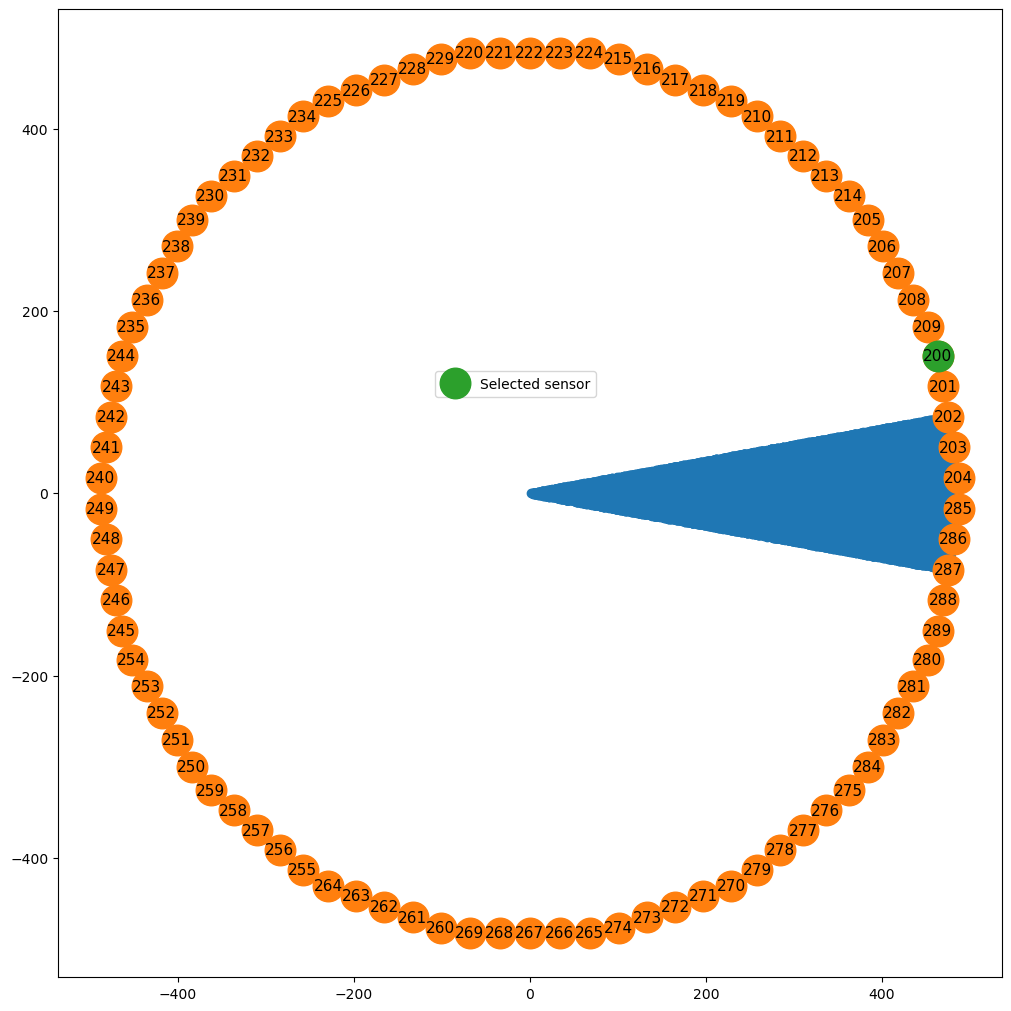

In [3]:
sens_map(200)

In [4]:
path = '/home/investigator/mariandbt/python/data'
path = path + '/20231025_NEXT100_full_mapping'

filename = os.path.join(path, "s2_table.h5")


with tb.open_file(filename) as file:
    print(file)

/home/investigator/mariandbt/python/data/20231025_NEXT100_full_mapping/s2_table.h5 (File) ''
Last modif.: '2023-12-12T15:50:17+00:00'
Object Tree: 
/ (RootGroup) ''
/sens_200 (Array(768, 5)) ''
/sens_201 (Array(768, 5)) ''
/sens_202 (Array(768, 5)) ''
/sens_203 (Array(768, 5)) ''
/sens_204 (Array(768, 5)) ''
/sens_205 (Array(768, 5)) ''
/sens_206 (Array(768, 5)) ''
/sens_207 (Array(768, 5)) ''
/sens_208 (Array(768, 5)) ''
/sens_209 (Array(768, 5)) ''
/sens_210 (Array(768, 5)) ''
/sens_211 (Array(768, 5)) ''
/sens_212 (Array(768, 5)) ''
/sens_213 (Array(768, 5)) ''
/sens_214 (Array(768, 5)) ''
/sens_215 (Array(768, 5)) ''
/sens_216 (Array(768, 5)) ''
/sens_217 (Array(768, 5)) ''
/sens_218 (Array(768, 5)) ''
/sens_219 (Array(768, 5)) ''
/sens_220 (Array(768, 5)) ''
/sens_221 (Array(768, 5)) ''
/sens_222 (Array(768, 5)) ''
/sens_223 (Array(768, 5)) ''
/sens_224 (Array(768, 5)) ''
/sens_225 (Array(768, 5)) ''
/sens_226 (Array(768, 5)) ''
/sens_227 (Array(768, 5)) ''
/sens_228 (Array(768, 5

In [5]:
import h5py

# Load the 3D dictionary from the HDF5 file
loaded_data_dict = {}

columns = {0:'bin_initial_x',
           1:'bin_final_x',
           2:'bin_initial_y',
           3:'bin_final_y',
           4:'s2'
          }

with h5py.File(filename, 'r') as file:
    for table_id in file.keys():
        # Get the column names from the HDF5 attributes
        loaded_data_dict[table_id] = pd.DataFrame(file[table_id][:])
        loaded_data_dict[table_id].rename(columns = columns, inplace=True)



In [6]:
s2_table = loaded_data_dict.copy()

In [7]:
s2_table.keys()

dict_keys(['sens_200', 'sens_201', 'sens_202', 'sens_203', 'sens_204', 'sens_205', 'sens_206', 'sens_207', 'sens_208', 'sens_209', 'sens_210', 'sens_211', 'sens_212', 'sens_213', 'sens_214', 'sens_215', 'sens_216', 'sens_217', 'sens_218', 'sens_219', 'sens_220', 'sens_221', 'sens_222', 'sens_223', 'sens_224', 'sens_225', 'sens_226', 'sens_227', 'sens_228', 'sens_229', 'sens_230', 'sens_231', 'sens_232', 'sens_233', 'sens_234', 'sens_235', 'sens_236', 'sens_237', 'sens_238', 'sens_239', 'sens_240', 'sens_241', 'sens_242', 'sens_243', 'sens_244', 'sens_245', 'sens_246', 'sens_247', 'sens_248', 'sens_249', 'sens_250', 'sens_251', 'sens_252', 'sens_253', 'sens_254', 'sens_255', 'sens_256', 'sens_257', 'sens_258', 'sens_259', 'sens_260', 'sens_261', 'sens_262', 'sens_263', 'sens_264', 'sens_265', 'sens_266', 'sens_267', 'sens_268', 'sens_269', 'sens_270', 'sens_271', 'sens_272', 'sens_273', 'sens_274', 'sens_275', 'sens_276', 'sens_277', 'sens_278', 'sens_279', 'sens_280', 'sens_281', 'sens

-  <p style="font-size: 17px; color: black;"> <b> Reading the file </b> </p>

-  <p style="font-size: 17px; color: black;"> File's path </p>

In [8]:
path = '/home/investigator/mariandbt/python/data'
path = path + '/20231025_NEXT100_full_mapping'

filename = os.path.join(path, "Next100_bb.next.h5")


-  <p style="font-size: 17px; color: black;"> In a .h5 file there are several objects, so we print them all to then pick the one we're interested in </p>

In [9]:
with tb.open_file(filename) as file:
    print(file)

/home/investigator/mariandbt/python/data/20231025_NEXT100_full_mapping/Next100_bb.next.h5 (File) ''
Last modif.: '2023-12-04T17:20:09+00:00'
Object Tree: 
/ (RootGroup) ''
/MC (Group) ''
/MC/configuration (Table(46,)) ''
/MC/hits (Table(810,)) ''
/MC/particles (Table(109720,)) ''
/MC/sns_positions (Table(136,)) ''
/MC/sns_response (Table(1445,)) ''



In [10]:
# %%timeit # WITH THIS YOU'RE ONLY TIMING, BUT IT DOESN'T REALLY RUN THE COMMANDS YOU TIME
bb_particles = pd.read_hdf(filename, "/MC/particles")
bb_sensors = pd.read_hdf(filename, "/MC/sns_positions")
bb_data = pd.read_hdf(filename, "/MC/sns_response")


In [11]:
bb_dst_particle = bb_particles.copy()
bb_sens = bb_sensors.copy()
bb_dst = bb_data.copy()


In [12]:
bb_ie = bb_dst_particle.loc[bb_dst_particle.particle_name == 'ie-'].copy()
bb_ie.loc[:, 's2'] = 0 # we add a column to save the s2 signal in [e] each ie⁻ produces

In [13]:
bb_ie

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc,s2
0,0,242,ie-,0,2,256.111298,-40.916672,596.808167,0.002822,255.334656,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
1,0,241,ie-,0,2,255.913925,-41.441330,596.515015,0.000663,259.082855,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
2,0,240,ie-,0,2,255.965851,-41.303299,596.592102,0.001231,253.311218,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
3,0,239,ie-,0,2,256.081177,-40.996746,596.763428,0.002493,254.095886,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
4,0,238,ie-,0,2,256.126526,-40.876194,596.830811,0.002989,264.304260,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109715,0,248169,ie-,0,1,251.959900,-56.545250,612.536743,0.307735,257.738281,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
109716,0,248168,ie-,0,1,251.959900,-56.545315,612.536743,0.307732,257.368500,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
109717,0,248167,ie-,0,1,251.959854,-56.545002,612.536804,0.307747,256.739258,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0
109718,0,248166,ie-,0,1,251.959946,-56.545502,612.536682,0.307723,248.067902,...,0.0,0.001011,0.0,0.0,0.001011,0.000001,1.0,Clustering,Drift,0


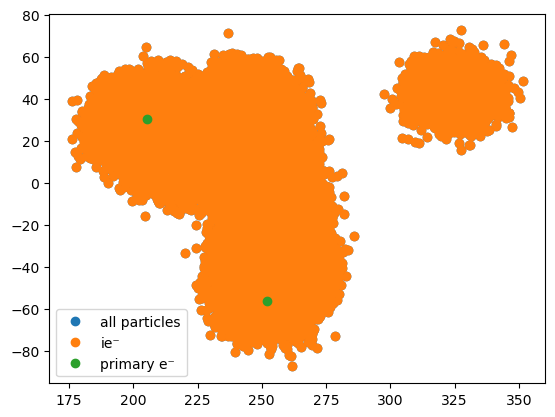

In [14]:
plt.plot(bb_dst_particle.final_x, bb_dst_particle.final_y, 'o', label = 'all particles')
plt.plot(bb_ie.final_x, bb_ie.final_y, 'o', label = 'ie⁻')
plt.plot(bb_dst_particle.loc[bb_dst_particle.primary == 1].final_x, 
         bb_dst_particle.loc[bb_dst_particle.primary == 1].final_y, 'o', label = 'primary e⁻')
plt.legend()
plt.show()

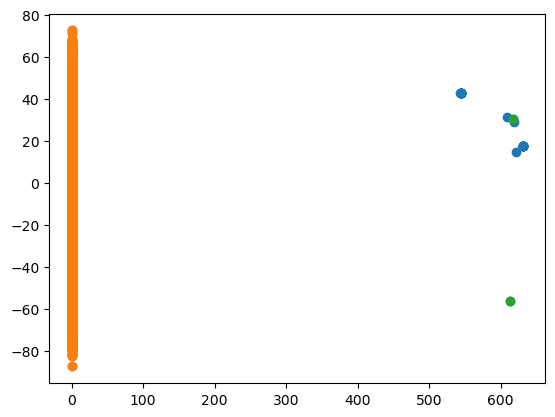

In [15]:
plt.plot(bb_dst_particle.final_z, bb_dst_particle.final_y, 'o')
plt.plot(bb_ie.final_z, bb_ie.final_y, 'o')
plt.plot(bb_dst_particle.loc[bb_dst_particle.primary == 1].final_z, 
         bb_dst_particle.loc[bb_dst_particle.primary == 1].final_y, 'o')
plt.show()

In [16]:
n_panels = 18
dtheta = 2*np.pi/n_panels # rad
active_diam = 984 # [mm]

In [17]:
xx = bb_ie.loc[bb_ie.final_y == bb_ie.final_y.min()].final_x.values
yy = bb_ie.final_y.min()

In [18]:
def find_rot(xx, yy):
    rot = -10

    theta = np.arctan2(yy, xx) 

    while not ((theta < (dtheta/2 + dtheta*rot)) & 
               (theta > (-dtheta/2 + dtheta*rot))).all():
        rot += 1
        if rot > n_panels:
            print('ERROR')
            break

    return rot

In [19]:
pp = '/home/investigator/mariandbt/python/data'
pp = pp + '/20231025_NEXT100_full_mapping'
flnm = os.path.join(pp, "Next100_full_mapp_s2_inicioEL_100Kev.next.h5")
sens = pd.read_hdf(flnm, "/MC/sns_positions")

# we select the positions of the sensors at the end of the fibers
fiber_sens_mask = sens.loc[sens.sensor_name == 'F_SENSOR'].sensor_id # ID mask of the sensors at the end of the fibers
sens_fibers = sens.loc[sens.sensor_id.isin(fiber_sens_mask)] # get the positions of said sensors


In [20]:
def find_sensor(sensor_id, rot):
    
    # selected sensor position
    x = sens_fibers.loc[sens_fibers.sensor_id == sens_id].x.values
    y = sens_fibers.loc[sens_fibers.sensor_id == sens_id].y.values

    r = np.sqrt(x*x + y*y)
    theta = np.arctan2(y, x)

    # analogous sensor position
    new_theta = theta - rot*dtheta
    new_x = r*np.cos(new_theta)
    new_y = r*np.sin(new_theta)

    # analogous sensor id
    tol = 0.1 # [mm]

    new_sens_id = sens_fibers.loc[(np.fabs(sens_fibers.x - new_x) < tol) &
                                  (np.fabs(sens_fibers.y - new_y) < tol)
                                 ].sensor_id.values
    new_sens_id = int(new_sens_id)
    
    return new_sens_id

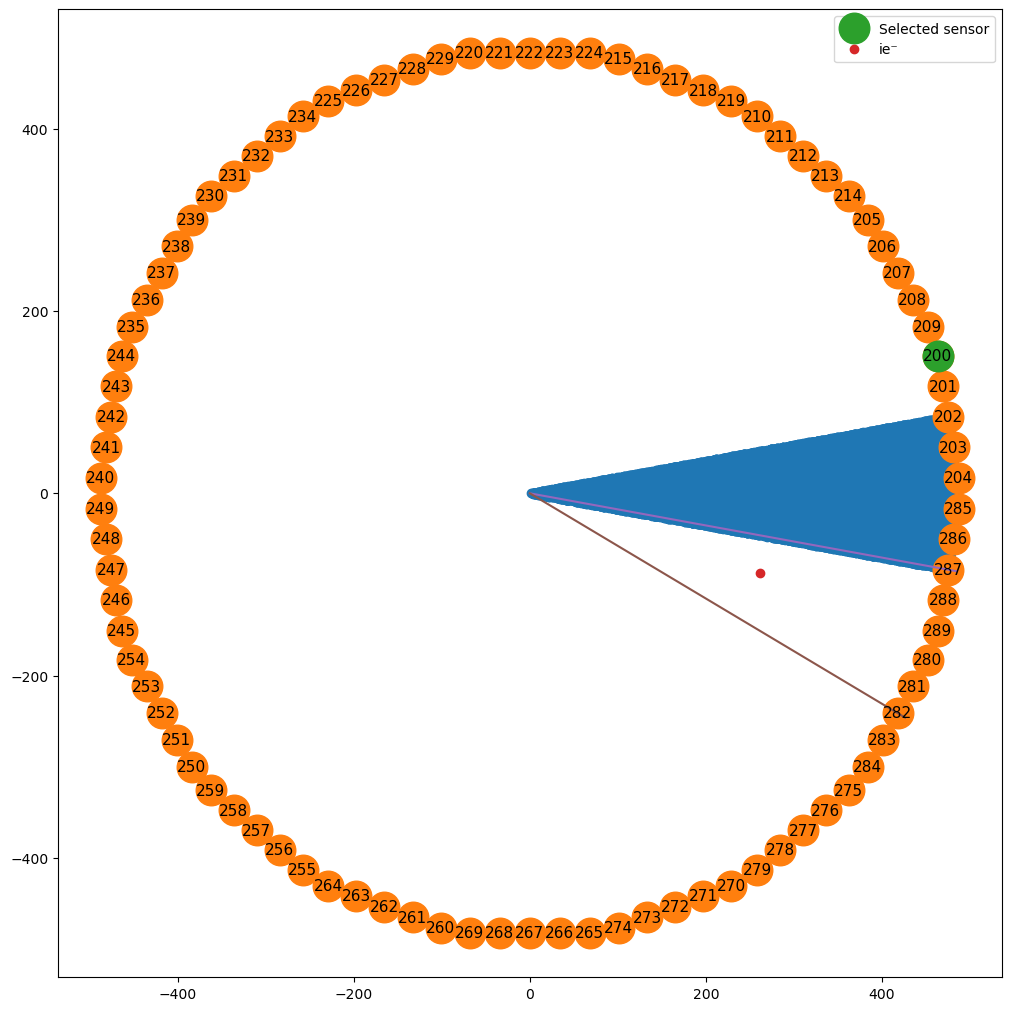

In [21]:
sens_map(200)

plt.plot(xx, yy, 'o', label = 'ie⁻')

radius = np.linspace(0, active_diam/2, 100)
rr = find_rot(xx, yy)
xx_ = radius*np.cos(dtheta/2 + dtheta*(rr))
plt.plot(xx_ , xx_*np.tan(dtheta/2 + dtheta*(rr)))
xx_ = radius*np.cos(-dtheta/2 + dtheta*(rr))
plt.plot(xx_ , xx_*np.tan(-dtheta/2 + dtheta*(rr)))

plt.legend()
plt.show()

In [22]:
def find_s2(sens_id, part_id):
    # position of the particles
    tt = bb_ie.loc[bb_ie.particle_id == part_id].final_t.values
    xx = bb_ie.loc[bb_ie.particle_id == part_id].final_x.values
    yy = bb_ie.loc[bb_ie.particle_id == part_id].final_y.values

    r = np.sqrt(xx*xx + yy*yy)
    theta = np.arctan2(yy, xx)

    rot = find_rot(xx, yy)

    # analogous position in the sector
    new_theta = theta - rot*dtheta
    new_xx = float(r*np.cos(new_theta))
    new_yy = float(r*np.sin(new_theta))

    new_sens_id = find_sensor(sens_id, rot)

    s2_tab = s2_table[f'sens_{new_sens_id}']

    s2_signal = s2_tab.loc[(s2_tab.bin_initial_x < new_xx) &
                           (new_xx < s2_tab.bin_final_x) &
                           (s2_tab.bin_initial_y < new_yy) &
                           (new_yy < s2_tab.bin_final_y) 
                          ].s2.values
    
    return float(tt), float(s2_signal)

In [103]:
%timeit find_s2(sens_id, part_id)

5.15 ms ± 595 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [102]:
%%timeit

s2_dict = {}

for jj, sens_id in enumerate(sens_fibers.sensor_id[:1]):

    table_id = f'sens_{sens_id}'
    table_data = pd.DataFrame(columns=[])

    event_print = 100

    for ii, part_id in enumerate(bb_ie.particle_id[:1000]):

        tt, s2_signal = find_s2(sens_id, part_id)

        new_row = {'time':tt, 's2':s2_signal}

        table_data = table_data.append(new_row, ignore_index=True)


        if (ii > event_print*10):
            event_print = event_print*10

        if (ii % event_print == 0):
            print(f'{ii}/{len(bb_ie)} events processed for sensor {jj}/90')

    s2_dict[table_id] = table_data


0/109684 events processed for sensor 0/90
100/109684 events processed for sensor 0/90
200/109684 events processed for sensor 0/90
300/109684 events processed for sensor 0/90
400/109684 events processed for sensor 0/90
500/109684 events processed for sensor 0/90
600/109684 events processed for sensor 0/90
700/109684 events processed for sensor 0/90
800/109684 events processed for sensor 0/90
900/109684 events processed for sensor 0/90
0/109684 events processed for sensor 0/90
100/109684 events processed for sensor 0/90
200/109684 events processed for sensor 0/90
300/109684 events processed for sensor 0/90
400/109684 events processed for sensor 0/90
500/109684 events processed for sensor 0/90
600/109684 events processed for sensor 0/90
700/109684 events processed for sensor 0/90
800/109684 events processed for sensor 0/90
900/109684 events processed for sensor 0/90
0/109684 events processed for sensor 0/90
100/109684 events processed for sensor 0/90
200/109684 events processed for sensor

In [26]:
# Save the 3D dictionary using HDF5 format
with h5py.File('../data/bb0nu_s2_signal.h5', 'w') as file:
    for table_id, table_data in s2_dict.items():
        file.create_dataset(table_id, data=table_data.values)

In [27]:
s2_dict.keys()

dict_keys(['sens_222', 'sens_203', 'sens_273', 'sens_204', 'sens_240', 'sens_200', 'sens_266', 'sens_201', 'sens_289', 'sens_264', 'sens_226', 'sens_275', 'sens_255', 'sens_219', 'sens_228', 'sens_254', 'sens_270', 'sens_223', 'sens_238', 'sens_282', 'sens_253', 'sens_236', 'sens_210', 'sens_280', 'sens_283', 'sens_258', 'sens_214', 'sens_231', 'sens_246', 'sens_220', 'sens_287', 'sens_285', 'sens_286', 'sens_202', 'sens_261', 'sens_207', 'sens_247', 'sens_242', 'sens_245', 'sens_257', 'sens_271', 'sens_276', 'sens_250', 'sens_272', 'sens_251', 'sens_213', 'sens_256', 'sens_211', 'sens_209', 'sens_281', 'sens_244', 'sens_225', 'sens_229', 'sens_215', 'sens_230', 'sens_218', 'sens_221', 'sens_288', 'sens_234', 'sens_217', 'sens_274', 'sens_269', 'sens_235', 'sens_249', 'sens_233', 'sens_232', 'sens_278', 'sens_205', 'sens_260', 'sens_248', 'sens_227', 'sens_277', 'sens_268', 'sens_206', 'sens_279', 'sens_208', 'sens_262', 'sens_284', 'sens_263', 'sens_267', 'sens_212', 'sens_237', 'sens

In [50]:
np.arange(0, 2, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

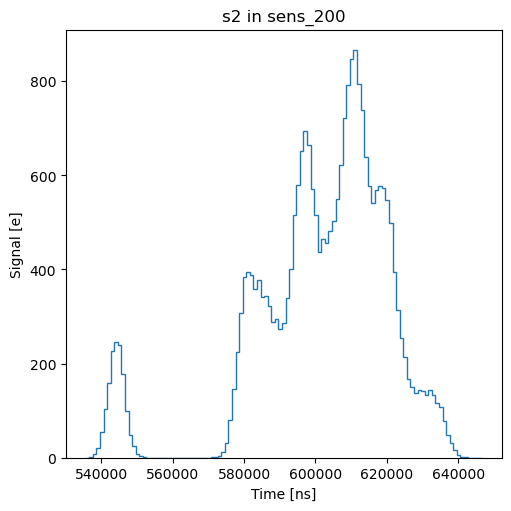

In [52]:
sensor = 'sens_200'

signal = s2_dict[sensor]

t = signal.time
s2 = signal.s2

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), constrained_layout=True)

bin_width = 1000 # [ns] = 1 [us]
binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
font_size = 8.5

events, bins, bars = ax.hist(t, binin, 
                             weights = s2,
                             density=False,
                             label='s2', 
                             histtype='step')

ax.set_title(f's2 in {sensor}');
ax.set_xlabel('Time [ns]');
ax.set_ylabel('Signal [e]');

In [54]:
len(bins)

112

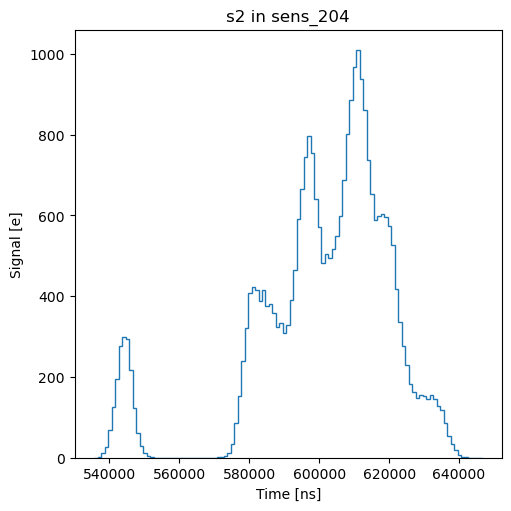

In [56]:
sensor = 'sens_204'

signal = s2_dict[sensor]

t = signal.time
s2 = signal.s2

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), constrained_layout=True)

bin_width = 1000 # [ns] = 1 [us]
binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
font_size = 8.5

events, bins, bars = ax.hist(t, binin, 
                             weights = s2,
                             density=False,
                             label='s2', 
                             histtype='step')

ax.set_title(f's2 in {sensor}');
ax.set_xlabel('Time [ns]');
ax.set_ylabel('Signal [e]');

In [86]:
hist_max = np.array([])
hist_max_sens = np.array([])

for sensor in s2_dict.keys():
    signal = s2_dict[sensor]

    t = signal.time
    s2 = signal.s2

    bin_width = 1000 # [ns] = 1 [us]
    binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
    font_size = 8.5

    # Create a histogram
    hist_values, bin_edges = np.histogram(t, bins=binin,
                                          weights = s2)

    hist_max = np.append(hist_max, hist_values.max())
    hist_max_sens = np.append(hist_max_sens, sensor)
    

In [87]:
hist_max.max()

1067.7581710897211

In [90]:
str(hist_max_sens[hist_max == hist_max.max()][0])

'sens_287'

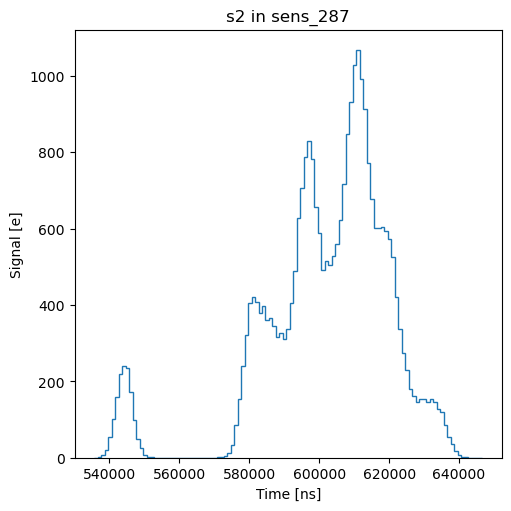

In [91]:
sensor = str(hist_max_sens[hist_max == hist_max.max()][0])

signal = s2_dict[sensor]

t = signal.time
s2 = signal.s2

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), constrained_layout=True)

bin_width = 1000 # [ns] = 1 [us]
binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
font_size = 8.5

events, bins, bars = ax.hist(t, binin, 
                             weights = s2,
                             density=False,
                             label='s2', 
                             histtype='step')

ax.set_title(f's2 in {sensor}');
ax.set_xlabel('Time [ns]');
ax.set_ylabel('Signal [e]');

In [101]:
%%timeit
s2_dict = {}


for jj, sens_id in enumerate(sens_fibers.sensor_id[:1]):
    
    table_id = f'sens_{sens_id}'

    # Use NumPy arrays to store data before creating the DataFrame
    time_data = np.empty(len(bb_ie), dtype=float)
    s2_data = np.empty(len(bb_ie), dtype=float)

    event_print = 100
    
    for ii, part_id in enumerate(bb_ie.particle_id[:1000]):
        time_data[ii], s2_data[ii] = find_s2(sens_id, part_id)

        if ii > event_print * 10:
            event_print = event_print * 10

        if ii % event_print == 0:
            print(f'{ii}/{len(bb_ie)} events processed for sensor {jj}/90')

    # Create the DataFrame after the loop using a dictionary
    table_data = pd.DataFrame({'time': time_data, 's2': s2_data})
    s2_dict[table_id] = table_data


0/109684 events processed for sensor 0/90
100/109684 events processed for sensor 0/90
200/109684 events processed for sensor 0/90
300/109684 events processed for sensor 0/90
400/109684 events processed for sensor 0/90
500/109684 events processed for sensor 0/90
600/109684 events processed for sensor 0/90
700/109684 events processed for sensor 0/90
800/109684 events processed for sensor 0/90
900/109684 events processed for sensor 0/90
0/109684 events processed for sensor 0/90
100/109684 events processed for sensor 0/90
200/109684 events processed for sensor 0/90
300/109684 events processed for sensor 0/90
400/109684 events processed for sensor 0/90
500/109684 events processed for sensor 0/90
600/109684 events processed for sensor 0/90
700/109684 events processed for sensor 0/90
800/109684 events processed for sensor 0/90
900/109684 events processed for sensor 0/90
0/109684 events processed for sensor 0/90
100/109684 events processed for sensor 0/90
200/109684 events processed for sensor